In [2]:
import pandas as pd
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

series = pd.read_csv('sales-of-shampoo.csv', header=0, parse_dates=True, index_col='Month')

series.head()

,Sales of shampoo over a three year period
Month,
1-01,266.0
1-02,145.9
1-03,183.1
1-04,119.3
1-05,180.3


In [3]:
series.dropna(axis=0, inplace=True)

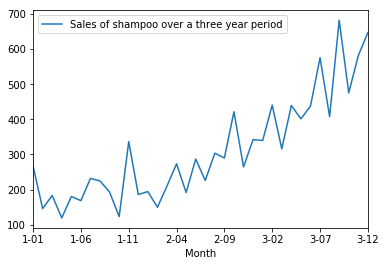

In [4]:
series.plot()
pyplot.show()

In [5]:
### Above Output we can see shampoo sales data trend

In [6]:
X = series.values
X

array([[ 266. ],
       [ 145.9],
       [ 183.1],
       [ 119.3],
       [ 180.3],
       [ 168.5],
       [ 231.8],
       [ 224.5],
       [ 192.8],
       [ 122.9],
       [ 336.5],
       [ 185.9],
       [ 194.3],
       [ 149.5],
       [ 210.1],
       [ 273.3],
       [ 191.4],
       [ 287. ],
       [ 226. ],
       [ 303.6],
       [ 289.9],
       [ 421.6],
       [ 264.5],
       [ 342.3],
       [ 339.7],
       [ 440.4],
       [ 315.9],
       [ 439.3],
       [ 401.3],
       [ 437.4],
       [ 575.5],
       [ 407.6],
       [ 682. ],
       [ 475.3],
       [ 581.3],
       [ 646.9]])

In [7]:
size = int(len(X) * 0.60)
print(len(X))
print(size)

36
21


In [8]:
train, test = X[0:size], X[size:len(X)]

In [9]:
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

predicted=272.964495, expected=421.600000
predicted=290.313723, expected=264.500000
predicted=349.117684, expected=342.300000
predicted=306.512900, expected=339.700000
predicted=387.376414, expected=440.400000
predicted=348.154221, expected=315.900000
predicted=386.308828, expected=439.300000
predicted=356.082080, expected=401.300000
predicted=446.379446, expected=437.400000
predicted=394.737301, expected=575.500000
predicted=434.915562, expected=407.600000
predicted=507.923500, expected=682.000000
predicted=435.482718, expected=475.300000
predicted=652.743847, expected=581.300000
predicted=546.343354, expected=646.900000
Test MSE: 7547.808


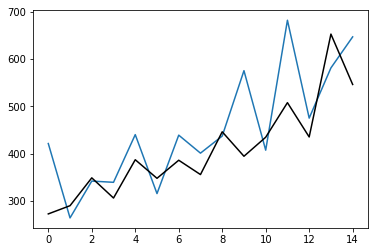

In [10]:
pyplot.plot(test)
pyplot.plot(predictions, color='Black')
pyplot.show()